In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [2]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
  try:
    # Currently, memory growth needs to be the same across GPUs
    for gpu in gpus:
      tf.config.experimental.set_memory_growth(gpu, True)
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
  except RuntimeError as e:
    # Memory growth must be set before GPUs have been initialized
    print(e)

Num GPUs Available:  2
2 Physical GPUs, 2 Logical GPUs


In [3]:
train_dir = '/home/mikylab/cycleGan/melanomaImages/train/'
train_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/train.csv')

test_dir = '/home/mikylab/cycleGan/2016_test_data/'
test_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/ISBI2016_GroundTruth.csv')
train_csv.shape

test_2017_dir = '/home/mikylab/cycleGan/ISIC-2017_TestData/'
test_2017_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/ISIC-2017_Test_GroundTruth.csv')

In [4]:
MSKCC_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/MSKCC_contribution.csv')

In [5]:
MSKCC_frame = pd.DataFrame({'image_dir': MSKCC_csv['name'], 'target': MSKCC_csv['meta.clinical.benign_malignant']})

In [6]:
MSKCC_frame.target[MSKCC_frame.target == 'benign'] = 0
MSKCC_frame.target[MSKCC_frame.target == 'malignant'] = 1
MSKCC_frame.target = MSKCC_frame.target.apply(int)

In [7]:
MSKCC_mal_train = MSKCC_frame[MSKCC_frame['target']==1]
MSKCC_ben_train2 = MSKCC_frame[MSKCC_frame['target']==0]#.sample(n=500, random_state = 316)
MSKCC_ben_train = MSKCC_frame[MSKCC_frame['target']==0].sample(n=500, random_state = 316)
MSKCC_frame =  pd.concat([MSKCC_mal_train, MSKCC_ben_train], ignore_index=True, sort =False)

In [8]:
MSKCC_frame['image_dir'] = train_dir + MSKCC_frame['image_dir'] + '.jpg'

In [9]:
MSKCC_frame2 =  pd.concat([MSKCC_mal_train, MSKCC_ben_train2], ignore_index=True, sort =False)
MSKCC_frame2['image_dir'] = train_dir + MSKCC_frame2['image_dir'] + '.jpg'

In [10]:
BCN_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/BCN_contribution.csv')
BCN_frame = pd.DataFrame({'image_dir': BCN_csv['name'], 'target': BCN_csv['meta.clinical.benign_malignant']})
BCN_frame.target[BCN_frame.target == 'benign'] = 0
BCN_frame.target[BCN_frame.target == 'malignant'] = 1
BCN_frame.target = BCN_frame.target.apply(int)


In [11]:
BCN_frame_mal_train = BCN_frame[BCN_frame['target']==1]
BCN_frame_ben_train = BCN_frame[BCN_frame['target']==0].sample(n=500, random_state = 316)

In [12]:
BCN_frame_mal_train.shape

(179, 2)

In [13]:
BCN_frame['image_dir'] = train_dir + BCN_frame['image_dir'] + '.jpg'

In [14]:
benchmark_derm_dir = '/home/mikylab/cycleGan/BenchmarkDermoscopic/test/'
benchmark_derm_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/DermoscopicNameSource.csv')

In [15]:
benchmark_clin_dir = '/home/mikylab/cycleGan/BenchmarkClinical/test/'
benchmark_clin_csv = pd.read_csv('/home/mikylab/cycleGan/clinic_csv/ClinicalNameSource.csv')

In [16]:
benchmark_clin_csv = benchmark_clin_csv.rename(columns={'file name': 'image_dir','Unnamed: 2': 'target'})

benchmark_clin_csv=benchmark_clin_csv.iloc[:,1:3]

In [17]:
benchmark_clin_csv.target[benchmark_clin_csv.target == 'CD'] = 0
benchmark_clin_csv.target[benchmark_clin_csv.target == 'h'] = 1

In [18]:
benchmark_clin_csv.target = benchmark_clin_csv.target.apply(int)

In [19]:
benchmark_clin_csv['image_dir'] = benchmark_clin_dir + benchmark_clin_csv['image_dir'] + '.jpg'

In [20]:
benchmark_derm_csv = benchmark_derm_csv.rename(columns={'file name': 'image_dir','ground trut0': 'target'})
benchmark_derm_csv = benchmark_derm_csv.iloc[:,1:3]

In [21]:
benchmark_derm_csv.image_dir= benchmark_derm_csv.image_dir.apply(str)

In [22]:
benchmark_derm_csv['image_dir'] = benchmark_derm_dir + benchmark_derm_csv['image_dir'] + '.jpg'

In [23]:
mal_train = train_csv[train_csv['target']==1]
ben_train = train_csv[train_csv['target']==0].sample(n=2000, random_state = 316)

In [24]:
#combine and change image_name to directory values
total_train =  pd.concat([mal_train, ben_train], ignore_index=True, sort =False)
total_train['image_name'] = train_dir + total_train['image_name'] + '.jpg'

#remove unnecessary columns
total_train = total_train.drop(['patient_id', 'sex', 'age_approx', 'anatom_site_general_challenge', 'diagnosis', 'benign_malignant'], axis = 1)

In [25]:
total_test = pd.DataFrame({'image_dir': test_csv['ISIC_0000003'], 'target': test_csv['0.0']})

In [26]:
total_test['image_dir'] = test_dir + total_test['image_dir'] + '.jpg'

In [27]:
test_2017_frame = pd.DataFrame({'image_dir': test_2017_csv['image_id'], 'target': test_2017_csv['melanoma']})

In [90]:
test_2017_frame['image_dir'] = test_2017_dir + test_2017_frame['image_dir'] + '.jpg'

In [91]:
# from sklearn.model_selection import train_test_split
# x_train, x_val, y_train, y_val = train_test_split(total_train['image_name'], total_train['target'], test_size = 0.2, shuffle = True, random_state = 316)
# train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
# val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})



In [123]:
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(MSKCC_frame['image_dir'], MSKCC_frame['target'], test_size = 0.2, shuffle = True, random_state = 316)
train_gen = pd.DataFrame({'image_dir': x_train, 'target': y_train})
val_gen = pd.DataFrame({'image_dir': x_val, 'target': y_val})


In [131]:
from sklearn.model_selection import train_test_split
x_train2, x_val2, y_train2, y_val2 = train_test_split(MSKCC_frame2['image_dir'], MSKCC_frame2['target'], test_size = 0.2, shuffle = True, random_state = 316)
train_gen2 = pd.DataFrame({'image_dir': x_train2, 'target': y_train2})
val_gen2 = pd.DataFrame({'image_dir': x_val2, 'target': y_val2})



In [24]:
benchmark_derm_csv.to_csv('clinic_csv/new_benchmark_derm.csv',index=False)
pd.read_csv('/home/mikylab/cycleGan/clinic_csv/new_benchmark_derm.csv')

,image_dir,target
0,11392,0.0
1,271,0.0
2,37,0.0
3,9564,0.0
4,299,1.0
...,...,...
95,494,0.0
96,6193,0.0
97,518,1.0
98,7322,0.0


In [25]:
benchmark_clin_csv.to_csv('clinic_csv/new_benchmark_clin.csv',index=False)
pd.read_csv('/home/mikylab/cycleGan/clinic_csv/new_benchmark_clin.csv')

,image_dir,target
0,19085,0
1,21457,0
2,21821,0
3,23559,0
4,896,1
...,...,...
95,2203387,0
96,2206231,0
97,307150,1
98,2207655,0


In [132]:
MSKCC_frame2.shape

(11108, 2)

In [134]:
val_gen2[val_gen2.target == 1].shape

(35, 2)

In [130]:
val_gen2.shape #BCN_frame_ben_train

(144, 2)

In [56]:
test_image_gen = ImageDataGenerator(rescale=1./255)

In [59]:
Val_Data = test_image_gen.flow_from_dataframe(dataframe = val_gen,
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = True,
#                                               subset = 'validation'
                                    )

Found 144 validated image filenames.


In [46]:
Test_Data = test_image_gen.flow_from_dataframe(dataframe = total_test, 
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False,
                                              )

Found 378 validated image filenames.


In [47]:
Test_Data_17 = test_image_gen.flow_from_dataframe(dataframe = test_2017_frame, 
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False
                                              )

Found 600 validated image filenames.


In [48]:
Benchmark_Clinical = test_image_gen.flow_from_dataframe(dataframe = benchmark_clin_csv, 
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False
                                              )

Found 100 validated image filenames.


In [49]:
Benchmark_Derm = test_image_gen.flow_from_dataframe(dataframe = benchmark_derm_csv, 
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False
                                              )

Found 100 validated image filenames.


In [50]:
BCN_Test = test_image_gen.flow_from_dataframe(dataframe = BCN_frame, 
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw',
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = False,
                                              )

Found 7311 validated image filenames.


In [51]:
MSKCC_frame = test_image_gen.flow_from_dataframe(dataframe = MSKCC_frame,
                                              x_col = 'image_dir', 
                                              y_col = 'target', 
                                              class_mode = 'raw', 
                                              target_size = (256, 256),
                                              color_mode = 'rgb', 
                                              batch_size = 1, 
                                              seed = 316, 
                                              shuffle = True,
#                                               subset = 'training'
                                    )

Found 11108 validated image filenames.


In [86]:
load_model = tf.keras.models.load_model('models/cnn_melanoma_MSKCC_small_noweights_7.4.h5')



In [114]:
from PIL import Image

import array

def predict_image(path):
    image = np.asarray(Image.open(path))
    expand_img = np.expand_dims(image, axis = 0)/255.
    prediction = load_model.predict(expand_img) 
    return image, prediction[0][0]


In [ ]:
image_BCN_train = ['ISIC_8542407.jpg', 'ISIC_7633960.jpg', 'ISIC_9752016.jpg', 'ISIC_8202626.jpg']
transformed = ['predicted_img_0.png', 'predicted_img_1.png', 'predicted_img_2.png', 'predicted_img_3.png']

pathB = '/home/mikylab/datasets/cycleGan/trainB/'
pathB_pred = '/home/mikylab/cycleGan/predicted_MSKCC/'

image_MSKCC_train = ['ISIC_4944690.jpg', 'ISIC_5874721.jpg', 'ISIC_9281339.jpg', 'ISIC_7566403.jpg']

image_MSKCC_test = ['ISIC_2401705.jpg', 'ISIC_5834451.jpg', 'ISIC_3332704.jpg', 'ISIC_2003272.jpg']

image_BCN_test = ['ISIC_4813830.jpg', 'ISIC_2347991.jpg', 'ISIC_1092604.jpg', 'ISIC_6067663.jpg']



pathA = '/home/mikylab/datasets/cycleGan/trainA/'
pathA_pred = '/home/mikylab/cycleGan/predicted_BCN/'

pathA_test = '/home/mikylab/datasets/cycleGan/testA/'
pathB_test = '/home/mikylab/datasets/cycleGan/testB/'

# for i in transformed:
#     prediction = predict_image(pathB_pred + i)
#     print(prediction)

image, prediction = predict_image(pathB_test + image_BCN_test[2])
plt.imshow(image)
print(prediction)

In [27]:
train_x, train_y = Benchmark_Clinical.next()
train_x_new = train_x[0,:, :]
# plt.imshow(train_x_new)
print(train_y)

[0]


In [87]:
METRICS = [
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'), 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
#       tf.keras.metrics.SpecificityAtSensitivity(.82)
]
opt = tf.keras.optimizers.Adam(learning_rate = 1e-5 )#1e-5)

load_model.compile(loss='binary_crossentropy', metrics=METRICS,optimizer=opt)




In [52]:
load_model.evaluate(MSKCC_frame)

11108/11108 [==============================] - 599s 54ms/step - loss: 0.1356 - tp: 82.0000 - fp: 381.0000 - tn: 10511.0000 - fn: 134.0000 - accuracy: 0.9536 - precision: 0.1771 - recall: 0.3796 - auc: 0.8845 - prc: 0.1664


[0.1355852633714676,
 82.0,
 381.0,
 10511.0,
 134.0,
 0.9536370038986206,
 0.1771058291196823,
 0.37962964177131653,
 0.8845010995864868,
 0.16635377705097198]

In [50]:
load_model.evaluate(Benchmark_Clinical)

100/100 [==============================] - 3s 17ms/step - loss: 0.4758 - tp: 10.0000 - fp: 15.0000 - tn: 65.0000 - fn: 10.0000 - accuracy: 0.7500 - precision: 0.4000 - recall: 0.5000 - auc: 0.7603 - prc: 0.5449


[0.4758182168006897,
 10.0,
 15.0,
 65.0,
 10.0,
 0.75,
 0.4000000059604645,
 0.5,
 0.7603124976158142,
 0.5448906421661377]

In [47]:
load_model.evaluate(Benchmark_Derm)

100/100 [==============================] - 4s 23ms/step - loss: 0.8243 - tp: 7.0000 - fp: 17.0000 - tn: 63.0000 - fn: 13.0000 - accuracy: 0.7000 - precision: 0.2917 - recall: 0.3500 - auc: 0.6444 - prc: 0.2576


[0.824307382106781,
 7.0,
 17.0,
 63.0,
 13.0,
 0.699999988079071,
 0.2916666567325592,
 0.3499999940395355,
 0.6443749666213989,
 0.2576151490211487]

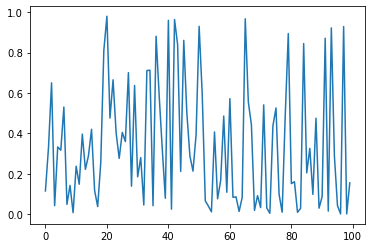

In [53]:
array = load_model.predict(Benchmark_Clinical)

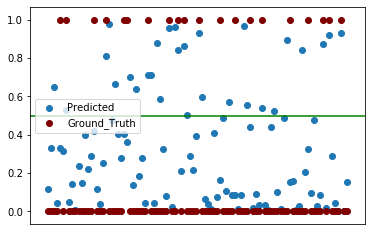

In [140]:
plt.scatter(benchmark_clin_csv['image_dir'], array, label ='Predicted')
plt.scatter(benchmark_clin_csv['image_dir'], benchmark_clin_csv['target'], color = 'Maroon', label = 'Ground_Truth')
plt.axhline(y=0.5, color='green', linestyle='-')
plt.legend()

ax = plt.gca()
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(True)

plt.show()

In [139]:
benchmark_derm_csv['target'][80:100]

80    1.0
81    0.0
82    0.0
83    0.0
84    0.0
85    0.0
86    1.0
87    0.0
88    0.0
89    0.0
90    0.0
91    1.0
92    0.0
93    1.0
94    0.0
95    0.0
96    0.0
97    1.0
98    0.0
99    0.0
Name: target, dtype: float64

In [39]:
predicted_labels_base = load_model.predict(Benchmark_Derm)
true_labels_base =benchmark_derm_csv['target'].to_numpy().reshape(100,)
predicted_labels_base =predicted_labels_base.squeeze()

(256, 256, 3)


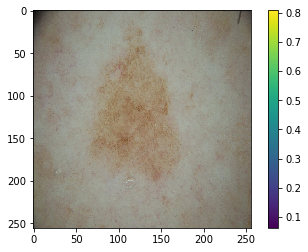

In [86]:
def show_img_gen(generator, color):
    for i in range(0,1):
        image = generator[i] 
        if (color == "grayscale"):
            newimage = reshape(image,(256,256))
            plt.imshow(newimage, cmap = 'gray')
            plt.colorbar()
        elif (color == "color"):
            print(image[0][0,:, :].shape)
            plt.imshow(image[0][0,:, :])
            plt.colorbar()

show_img_gen(Benchmark_Derm, 'color')

In [91]:
benchmark_derm_csv.iloc[1, 0]

'/home/mikylab/cycleGan/BenchmarkDermoscopic/test/271.jpg'

In [40]:
predicted_labels_base_clin = load_model.predict(Benchmark_Clinical)
true_labels_base_clin =benchmark_clin_csv['target'].to_numpy().reshape(100,)
predicted_labels_base_clin =predicted_labels_base_clin.squeeze()

In [48]:
predicted_labels_test = load_model.predict(Test_Data)

In [49]:
true_labels_test =total_test['target'].to_numpy().reshape(378,)
predicted_labels_test =predicted_labels_test.squeeze()

In [50]:
predicted_labels_test_17 = load_model.predict(Test_Data_17)
true_labels_test_17 =test_2017_frame['target'].to_numpy().reshape(600,)
predicted_labels_test_17 =predicted_labels_test_17.squeeze()

In [ ]:
predicted_labels_val = load_model.predict(Val_Data)

In [ ]:
true_labels_val =val_gen['target'].to_numpy().reshape(517,)
predicted_labels_val =predicted_labels_val.squeeze()

In [45]:
import sklearn

In [46]:
from sklearn import metrics
def plot_roc(name, labels, predictions, **kwargs):
    fp, tp, _ = sklearn.metrics.roc_curve(labels, predictions)
    plt.plot(100*fp, 100*tp, label=name, linewidth=2, **kwargs)
    plt.xlabel('False positives [%]')
    plt.ylabel('True positives [%]')
#     plt.xlim([-0.5,20])
#     plt.ylim([80,100.5])
    plt.grid(True)
    ax = plt.gca()
    ax.set_aspect('equal')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

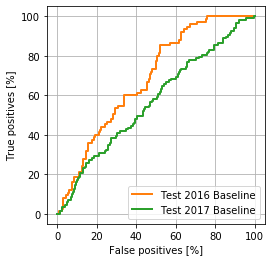

In [51]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
# plot_roc("Val Baseline", true_labels_val, predicted_labels_val, color=colors[0], linestyle='--')
plot_roc("Test 2016 Baseline", true_labels_test, predicted_labels_test, color=colors[1])
plot_roc("Test 2017 Baseline", true_labels_test_17, predicted_labels_test_17, color=colors[2])

plt.legend(loc='lower right')

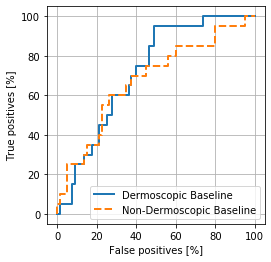

In [47]:
plot_roc("Dermoscopic Baseline", true_labels_base, predicted_labels_base, color=colors[0])
plot_roc("Non-Dermoscopic Baseline", true_labels_base_clin, predicted_labels_base_clin, color=colors[1], linestyle='--')
plt.legend(loc='lower right')
